<a href="https://colab.research.google.com/github/FedericoMz/DM2-FMAProject/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn import metrics

from collections import defaultdict

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB, MultinomialNB


# Stuff

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FMA Project/NeoNoOutTuttoNumeri.csv', skipinitialspace=True, na_values='?', keep_default_na=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4263 non-null   int64  
 1   album_title          4263 non-null   object 
 2   track_duration       4263 non-null   int64  
 3   track_listens        4263 non-null   float64
 4   acousticness         1120 non-null   float64
 5   danceability         1120 non-null   float64
 6   energy               1120 non-null   float64
 7   instrumentalness     1120 non-null   float64
 8   liveness             1120 non-null   float64
 9   speechiness          1120 non-null   float64
 10  tempo                1120 non-null   float64
 11  valence              1120 non-null   float64
 12  artist_discovery     1120 non-null   float64
 13  artist_familiarity   1120 non-null   float64
 14  artist_hotttnesss    1120 non-null   float64
 15  song_currency        1120 non-null   f

In [ ]:
class_name = 'popularity'
df.head()

,Unnamed: 0,album_title,track_duration,track_listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_favorites,album_listens,quality,popularity,Album,Live Performance,Radio Program,Single Tracks,EP
0,0,"""...Through The Cracks"" Mix Vol. 1",66,1190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1190,1.0,0.0,0,0,0,1,0
1,1,"""A.B.A.Y.A.M""",183,2598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2596,1.0,0.0,0,0,0,1,0
2,2,"""Aeroplanes""",152,1787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1785,4.0,0.0,0,0,0,1,0
3,3,"""All or Nothing"" Action Orchestra",88,1672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,0,4966,3.0,0.0,1,0,0,0,0
4,4,"""Cast Your Ship Upon Rain""",205,2080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2075,2.0,0.0,0,0,0,1,0


In [ ]:
from collections import Counter
z = df["popularity"]
Counter(z)

Counter({0.0: 4039, 1.0: 224})

In [ ]:


#eliminiamo il solito Unnamed, album title e favorites (che sballerebbe il classificatore)
del df["Unnamed: 0"]
del df["album_title"]
del df['album_favorites']

#eliminiamo le feature di echonest
del df["acousticness"]
del df ["danceability"]
del df ["energy"]
del df ["instrumentalness"]
del df ["liveness"]
del df ["speechiness"]
del df ["tempo"]
del df ["valence"]
del df ["artist_familiarity"]
del df ["artist_discovery"]  
del df ["artist_hotttnesss"]  
del df ["song_currency"]     
del df ["song_hotttnesss"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_duration       4263 non-null   int64  
 1   track_listens        4263 non-null   float64
 2   artist_favorites     4263 non-null   int64  
 3   Classical            4263 non-null   int64  
 4   Blues                4263 non-null   int64  
 5   Country              4263 non-null   int64  
 6   Easy Listening       4263 non-null   int64  
 7   Electronic           4263 non-null   int64  
 8   Experimental         4263 non-null   int64  
 9   Folk                 4263 non-null   int64  
 10  Hip-Hop              4263 non-null   int64  
 11  Instrumental         4263 non-null   int64  
 12  International        4263 non-null   int64  
 13  Jazz                 4263 non-null   int64  
 14  Old-Time / Historic  4263 non-null   int64  
 15  Pop                  4263 non-null   i

In [ ]:
df0 = df.copy()

In [ ]:
dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
dfX.head()

,track_duration,track_listens,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_listens,quality,Album,Live Performance,Radio Program,Single Tracks,EP
0,66,1190.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1190,1.0,0,0,0,1,0
1,183,2598.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2596,1.0,0,0,0,1,0
2,152,1787.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1785,4.0,0,0,0,1,0
3,88,1672.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,4966,3.0,1,0,0,0,0
4,205,2080.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2075,2.0,0,0,0,1,0


In [ ]:
dfY = df[class_name]
dfY.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: popularity, dtype: float64

In [ ]:
df = pd.concat([dfX, dfY], axis=1)
df.head()

,track_duration,track_listens,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_listens,quality,Album,Live Performance,Radio Program,Single Tracks,EP,popularity
0,66,1190.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1190,1.0,0,0,0,1,0,0.0
1,183,2598.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2596,1.0,0,0,0,1,0,0.0
2,152,1787.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1785,4.0,0,0,0,1,0,0.0
3,88,1672.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,4966,3.0,1,0,0,0,0,0.0
4,205,2080.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2075,2.0,0,0,0,1,0,0.0


In [ ]:
df0.copy()

,track_duration,track_listens,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_listens,quality,popularity,Album,Live Performance,Radio Program,Single Tracks,EP
0,66,1190.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1190,1.0,0.0,0,0,0,1,0
1,183,2598.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2596,1.0,0.0,0,0,0,1,0
2,152,1787.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1785,4.0,0.0,0,0,0,1,0
3,88,1672.000000,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,4966,3.0,0.0,1,0,0,0,0
4,205,2080.000000,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2075,2.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,1939,784.428571,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,6158,1.0,0.0,1,0,0,0,0
4259,1078,1446.000000,110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,7230,4.0,0.0,0,0,0,0,1
4260,854,613.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,4021,4.0,0.0,1,0,0,0,0
4261,234,1240.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1240,4.0,0.0,0,0,0,1,0


In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

X_OG, y_OG = X_train, y_train 

In [ ]:
#scaling features 
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler()
#scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
backup = df.copy()

In [ ]:
df = backup

# Gaussian

In [ ]:
dfNB = pd.DataFrame()

In [ ]:
df

,track_duration,track_listens,artist_favorites,Classical,Blues,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,album_num_tracks,album_listens,quality,Album,Live Performance,Radio Program,Single Tracks,EP,popularity
0,66,1190.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1190,1.0,0,0,0,1,0,0.0
1,183,2598.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2596,1.0,0,0,0,1,0,0.0
2,152,1787.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1785,4.0,0,0,0,1,0,0.0
3,88,1672.000000,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,4966,3.0,1,0,0,0,0,0.0
4,205,2080.000000,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2075,2.0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,1939,784.428571,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,6158,1.0,1,0,0,0,0,0.0
4259,1078,1446.000000,110,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,7230,4.0,0,0,0,0,1,0.0
4260,854,613.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,4021,4.0,1,0,0,0,0,0.0
4261,234,1240.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1240,4.0,0,0,0,1,0,0.0


Accuracy 0.9452697419859265
F1-score [0.97085762 0.55128205]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1212
         1.0       0.48      0.64      0.55        67

    accuracy                           0.95      1279
   macro avg       0.73      0.80      0.76      1279
weighted avg       0.95      0.95      0.95      1279



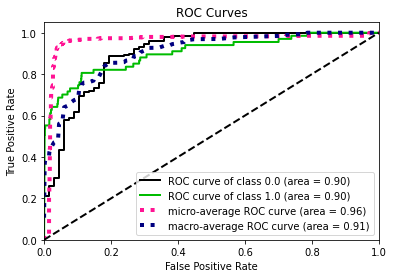

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_pred0 = y_pred
y_score=clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()



Accuracy 0.9710711493354183
F1-score [0.98486708 0.67256637]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1212
         1.0       0.83      0.57      0.67        67

    accuracy                           0.97      1279
   macro avg       0.90      0.78      0.83      1279
weighted avg       0.97      0.97      0.97      1279



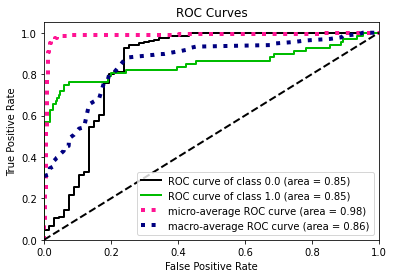

In [ ]:
clf = GaussianNB(var_smoothing=0.01)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_pred0 = y_pred
y_score=clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()



In [ ]:
X_train_num, X_test_num, y_train, y_test = train_test_split(
    df[[c for c in df.columns if c in ['album_listens']]], df[class_name], 
       test_size=0.3, random_state=100, stratify=df[class_name])


clf = GaussianNB()
clf.fit(X_train_num, y_train)
y_pred = clf.predict(X_test_num)
y_pred0 = y_pred
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
plot_roc(y_test, y_score)
plt.show()

NameError: ignored

Accuracy 0.9609069585613761
F1-score [0.97949139 0.58333333]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1212
         1.0       0.66      0.52      0.58        67

    accuracy                           0.96      1279
   macro avg       0.82      0.75      0.78      1279
weighted avg       0.96      0.96      0.96      1279



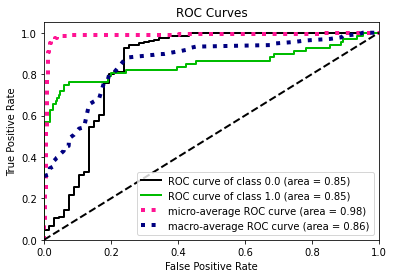

In [ ]:
X_train_num, X_test_num, y_train, y_test = train_test_split(
    df[[c for c in df.columns if c in ['track_listens', 'artist_favorites', 'track_duration']]], df[class_name], 
       test_size=0.3, random_state=100, stratify=df[class_name])


clf = GaussianNB(var_smoothing=0.01)
clf.fit(X_train_num, y_train)
y_pred = clf.predict(X_test_num)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
plot_roc(y_test, y_score)
plt.show()

Accuracy 0.9616888193901486
F1-score [0.9798768  0.60162602]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1212
         1.0       0.66      0.55      0.60        67

    accuracy                           0.96      1279
   macro avg       0.82      0.77      0.79      1279
weighted avg       0.96      0.96      0.96      1279



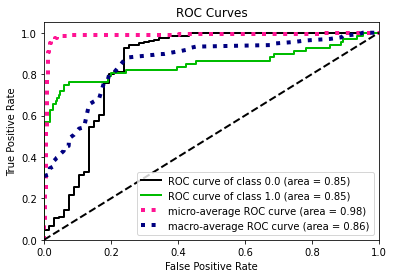

In [ ]:
X_train_num, X_test_num, y_train, y_test = train_test_split(
    df[[c for c in df.columns if c in ['album_listens']]], df[class_name], 
       test_size=0.3, random_state=100, stratify=df[class_name])


clf = GaussianNB(var_smoothing=0.005)
clf.fit(X_train_num, y_train)
y_pred = clf.predict(X_test_num)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()

In [ ]:
X_train_num, X_test_num, y_train, y_test = train_test_split(
    df[[c for c in df.columns if c in ['album_listens']]], df[class_name], 
       test_size=0.3, random_state=100, stratify=df[class_name])


clf = GaussianNB(var_smoothing=0.001)
clf.fit(X_train_num, y_train)
y_pred = clf.predict(X_test_num)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()

In [ ]:
X_OG, y_OG = X_train, y_train

NameError: ignored

In [ ]:
cat = df0[["Classical", "Country", "Easy Listening", "Electronic", "Experimental", "Folk", "Blues", "Hip-Hop", "Instrumental", "International",  "Jazz",  "Old-Time / Historic",  "Pop",  "Rock", "Soul-RnB", "Spoken"]].apply(LabelEncoder().fit_transform)

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour


# Categorical

Accuracy 0.9483971853010165
F1-score [0.97349398 0.02941176]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1212
         1.0       1.00      0.01      0.03        67

    accuracy                           0.95      1279
   macro avg       0.97      0.51      0.50      1279
weighted avg       0.95      0.95      0.92      1279



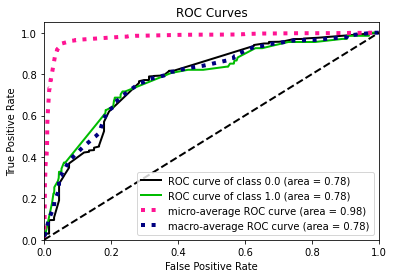

In [ ]:
df0_cat = df0[["Classical", "Country", "Easy Listening", "Electronic", "Experimental", "Folk", "Blues", "Hip-Hop", "Instrumental", "International",  "Jazz",  "Old-Time / Historic",  "Pop",  "Rock", "Soul-RnB", "Spoken", "Album", "EP", "Live Performance", "Radio Program",'Single Tracks']].apply(LabelEncoder().fit_transform)

X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    df0_cat, df[class_name], test_size=0.3, random_state=100, stratify=df[class_name])

clf = BernoulliNB()
clf.fit(X_train_cat, y_train)

y_pred = clf.predict(X_test_cat)
y_pred1 =y_pred
y_score=clf.predict_proba(X_test_cat)

y_pred = clf.predict(X_test_cat)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()

In [ ]:
adf = df
adf["Genre"] = " "
for i in range(len(adf)):
    if ((adf["Classical"].values[i] == 1.0)):
        adf["Genre"].values[i] = 1
    if ((adf["Easy Listening"].values[i] == 1.0)):
        adf["Genre"].values[i] = 2
    if ((adf["Electronic"].values[i] == 1.0)):
        adf["Genre"].values[i] = 3
    if ((adf["Experimental"].values[i] == 1.0)):
        adf["Genre"].values[i] = 4
    if ((adf["Folk"].values[i] == 1.0)):
        adf["Genre"].values[i] = 5
    if ((adf["Hip-Hop"].values[i] == 1.0)):
        adf["Genre"].values[i] = 6
    if ((adf["Instrumental"].values[i] == 1.0)):
        adf["Genre"].values[i] = 7
    if ((adf["International"].values[i] == 1.0)):
        adf["Genre"].values[i] = 8
    if ((adf["Jazz"].values[i] == 1.0)):
        adf["Genre"].values[i] = 9
    if ((adf["Old-Time / Historic"].values[i] == 1.0)):
        adf["Genre"].values[i] = 10
    if ((adf["Pop"].values[i] == 1.0)):
        adf["Genre"].values[i] = 11
    if ((adf["Rock"].values[i] == 1.0)):
        adf["Genre"].values[i] = 12
    if ((adf["Soul-RnB"].values[i] == 1.0)):
        adf["Genre"].values[i] = 13
    if ((adf["Spoken"].values[i] == 1.0)):
        adf["Genre"].values[i] = 14
    if ((adf["Blues"].values[i] == 1.0)):
        adf["Genre"].values[i] = 15
    if ((adf["Country"].values[i] == 1.0)):
        adf["Genre"].values[i] = 16




Accuracy 0.947615324472244
F1-score [0.97310317 0.        ]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1212
         1.0       0.00      0.00      0.00        67

    accuracy                           0.95      1279
   macro avg       0.47      0.50      0.49      1279
weighted avg       0.90      0.95      0.92      1279



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


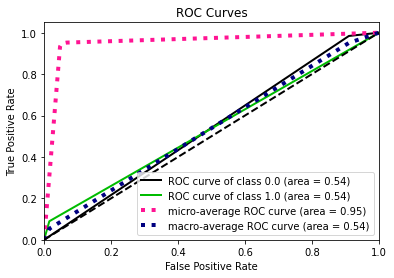

In [ ]:
df0_cat = df0[["Genre"]].apply(LabelEncoder().fit_transform)

X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    df0_cat, df[class_name], test_size=0.3, random_state=100, stratify=df[class_name])

clf = BernoulliNB()
clf.fit(X_train_cat, y_train)

y_pred = clf.predict(X_test_cat)
y_pred1 =y_pred
y_score=clf.predict_proba(X_test_cat)

y_pred = clf.predict(X_test_cat)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FMA Project/Binnato.csv', skipinitialspace=True, na_values='?', keep_default_na=True)
class_name = 'popularity'
del df['Unnamed: 0']
del df['album_favorites']
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_listens        4263 non-null   float64
 1   artist_favorites     4263 non-null   int64  
 2   Classical            4263 non-null   int64  
 3   Blues                4263 non-null   int64  
 4   Country              4263 non-null   int64  
 5   Easy Listening       4263 non-null   int64  
 6   Electronic           4263 non-null   int64  
 7   Experimental         4263 non-null   int64  
 8   Folk                 4263 non-null   int64  
 9   Hip-Hop              4263 non-null   int64  
 10  Instrumental         4263 non-null   int64  
 11  International        4263 non-null   int64  
 12  Jazz                 4263 non-null   int64  
 13  Old-Time / Historic  4263 non-null   int64  
 14  Pop                  4263 non-null   int64  
 15  Rock                 4263 non-null   i

Accuracy 0.9741985926505082
F1-score [0.98656899 0.67326733]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1212
         1.0       1.00      0.51      0.67        67

    accuracy                           0.97      1279
   macro avg       0.99      0.75      0.83      1279
weighted avg       0.97      0.97      0.97      1279



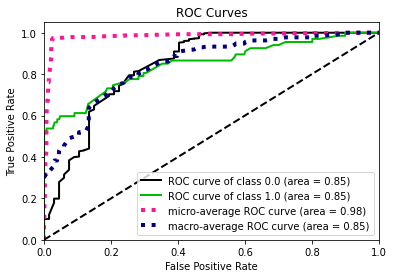

In [ ]:



clf = CategoricalNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 =y_pred
y_score=clf.predict_proba(X_test)

y_pred = clf.predict(X_test)
y_pred2 =y_pred

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()

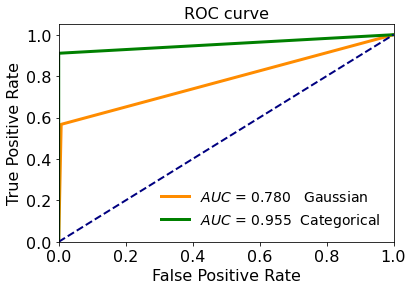

In [ ]:
fpr0, tpr0, _ = roc_curve(y_test, y_pred0)
roc_auc0 = auc(fpr0, tpr0)

fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)


plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC$ = %.3f   Gaussian' % (roc_auc0))
plt.plot(fpr1, tpr1, color='green', lw=3, label='$AUC$ = %.3f  Categorical' % (roc_auc1))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
#Bern si usa per le binarie, quindi uguale a prima senza quality
df0_cat = df0[["Classical", "Country", "Easy Listening", "Electronic", "Experimental", "Folk", "Blues", "Hip-Hop", "Instrumental", "International",  "Jazz",  "Old-Time / Historic",  "Pop",  "Rock", "Soul-RnB", "Spoken", "Album", "EP", "Live Performance", "Radio Program",'Single Tracks']].apply(LabelEncoder().fit_transform)

X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    df0_cat, df[class_name], test_size=0.3, random_state=100, stratify=df[class_name])

clf = BernoulliNB()
clf.fit(X_train_cat, y_train)

y_pred = clf.predict(X_test_cat)
y_pred2 =y_pred
y_score=clf.predict_proba(X_test_cat)

y_pred = clf.predict(X_test_cat)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

plot_roc(y_test, y_score)
plt.show()

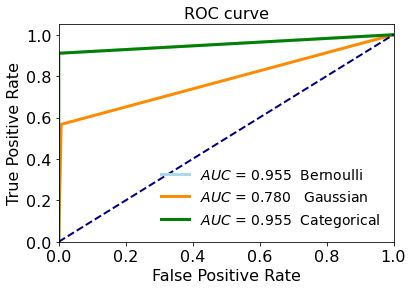

In [ ]:

fpr0, tpr0, _ = roc_curve(y_test, y_pred0)
roc_auc0 = auc(fpr0, tpr0)

fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)


plt.plot(fpr2, tpr2, color='lightblue', lw=3, label='$AUC$ = %.3f  Bernoulli' % (roc_auc2))
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC$ = %.3f   Gaussian' % (roc_auc0))
plt.plot(fpr1, tpr1, color='green', lw=3, label='$AUC$ = %.3f  Categorical' % (roc_auc1))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()